# Data preprocessing

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import holidays

# just set the seed for the random number generator
np.random.seed(107)

In [3]:
# Especificando o caminho padrão do projeto:
pasta = str("/content/drive/MyDrive/Python/MEU_TCC/Data/")
pasta

'/content/drive/MyDrive/Python/MEU_TCC/Data/'

In [4]:
# Lista de Feriados:

feriados= holidays.Brazil()
diasnu = pd.DataFrame(feriados['1996-01-01': '2023-12-31'],)

### Processando a Planilha de Preços:

In [5]:
# Read the Excel file into a DataFrame
df_prices = pd.read_excel(pasta + "StockPrice.xlsx")

# Excluindo Colunas vazias
df_prices.dropna(how="all",inplace=True,axis=1)

# Convert the 'data' column to datetime format
df_prices.index = pd.to_datetime(df_prices['Data'])
df_prices.drop(['Data'],inplace=True,axis=1)

# Convert all columns from 'VALE3' to 'WHMT3' to numeric format
for col in df_prices.columns:
    df_prices[col] = pd.to_numeric(df_prices[col])

df_prices = df_prices['1996-01-02':]

# Retirando feriados e fim de semanas:
df_prices = df_prices[~df_prices.index.isin(diasnu[0])]

df_prices

,VALE3,ITUB4,PETR4,PETR3,BBDC4,B3SA3,ABEV3,ELET3,WEGE3,RENT3,...,UBBR11,UNIP6,USIM3,USIM6,VALE5,VVAR11,VIVO3,VIVO4,BRDT4-old,WHMT3
Data,,,,,,,,,,,,,,,,,,,,,
1996-01-02,0.570028,0.121605,0.162268,0.102407,0.172185,NaN,0.095005,4.013801,NaN,NaN,...,NaN,0.146150,NaN,NaN,0.599353,NaN,NaN,NaN,0.011348,1.661263
1996-01-03,0.597947,0.132518,0.177540,0.113786,0.181092,NaN,0.103115,4.360859,NaN,NaN,...,NaN,0.147849,NaN,NaN,0.621016,NaN,NaN,NaN,0.011615,1.712643
1996-01-04,NaN,0.126950,0.180403,0.115050,0.180102,NaN,0.104273,4.270322,NaN,NaN,...,NaN,0.149549,NaN,NaN,0.617405,NaN,NaN,NaN,0.011948,1.695516
1996-01-05,NaN,0.130514,0.183267,0.116314,0.177133,NaN,0.102188,4.240143,NaN,NaN,...,NaN,0.147849,NaN,NaN,0.611990,NaN,NaN,NaN,0.012104,1.695516
1996-01-08,0.595621,0.134077,0.185176,0.121371,0.186039,NaN,0.101493,4.292957,NaN,NaN,...,NaN,0.149549,NaN,NaN,0.617405,NaN,NaN,NaN,0.012416,1.695516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,74.490000,32.570000,36.380000,38.110000,16.571456,14.17,13.740000,41.210000,36.16,62.768039,...,NaN,75.440000,8.47,15.99,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-21,76.970000,32.790000,36.390000,38.110000,16.581058,14.49,13.700000,41.600000,36.39,64.078809,...,NaN,76.160000,8.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-22,76.390000,33.310000,36.740000,38.620000,16.830000,14.51,13.710000,41.970000,36.51,64.068879,...,NaN,75.950000,9.06,15.99,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Fill NA para um limite de até 5 seguidos:
limit = 10
df_prices_interpolate = df_prices.interpolate(method="linear",limit=limit)
df_prices_interpolate

,VALE3,ITUB4,PETR4,PETR3,BBDC4,B3SA3,ABEV3,ELET3,WEGE3,RENT3,...,UBBR11,UNIP6,USIM3,USIM6,VALE5,VVAR11,VIVO3,VIVO4,BRDT4-old,WHMT3
Data,,,,,,,,,,,,,,,,,,,,,
1996-01-02,0.570028,0.121605,0.162268,0.102407,0.172185,NaN,0.095005,4.013801,NaN,NaN,...,NaN,0.146150,NaN,NaN,0.599353,NaN,NaN,NaN,0.011348,1.661263
1996-01-03,0.597947,0.132518,0.177540,0.113786,0.181092,NaN,0.103115,4.360859,NaN,NaN,...,NaN,0.147849,NaN,NaN,0.621016,NaN,NaN,NaN,0.011615,1.712643
1996-01-04,0.597172,0.126950,0.180403,0.115050,0.180102,NaN,0.104273,4.270322,NaN,NaN,...,NaN,0.149549,NaN,NaN,0.617405,NaN,NaN,NaN,0.011948,1.695516
1996-01-05,0.596396,0.130514,0.183267,0.116314,0.177133,NaN,0.102188,4.240143,NaN,NaN,...,NaN,0.147849,NaN,NaN,0.611990,NaN,NaN,NaN,0.012104,1.695516
1996-01-08,0.595621,0.134077,0.185176,0.121371,0.186039,NaN,0.101493,4.292957,NaN,NaN,...,NaN,0.149549,NaN,NaN,0.617405,NaN,NaN,NaN,0.012416,1.695516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,74.490000,32.570000,36.380000,38.110000,16.571456,14.17,13.740000,41.210000,36.16,62.768039,...,NaN,75.440000,8.47,15.99,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-21,76.970000,32.790000,36.390000,38.110000,16.581058,14.49,13.700000,41.600000,36.39,64.078809,...,NaN,76.160000,8.95,15.99,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-22,76.390000,33.310000,36.740000,38.620000,16.830000,14.51,13.710000,41.970000,36.51,64.068879,...,NaN,75.950000,9.06,15.99,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate the returns
df_returns = df_prices_interpolate.pct_change(1)
df_returns

,VALE3,ITUB4,PETR4,PETR3,BBDC4,B3SA3,ABEV3,ELET3,WEGE3,RENT3,...,UBBR11,UNIP6,USIM3,USIM6,VALE5,VVAR11,VIVO3,VIVO4,BRDT4-old,WHMT3
Data,,,,,,,,,,,,,,,,,,,,,
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,0.048980,0.089744,0.094118,0.111111,0.051724,NaN,0.085366,0.086466,NaN,NaN,...,NaN,0.011628,NaN,NaN,0.036145,NaN,NaN,NaN,0.023529,0.030928
1996-01-04,-0.001297,-0.042017,0.016129,0.011111,-0.005464,NaN,0.011236,-0.020761,NaN,NaN,...,NaN,0.011494,NaN,NaN,-0.005814,NaN,NaN,NaN,0.028736,-0.010000
1996-01-05,-0.001299,0.028070,0.015873,0.010989,-0.016484,NaN,-0.020000,-0.007067,NaN,NaN,...,NaN,-0.011364,NaN,NaN,-0.008772,NaN,NaN,NaN,0.013035,0.000000
1996-01-08,-0.001300,0.027304,0.010417,0.043478,0.050279,NaN,-0.006803,0.012456,NaN,NaN,...,NaN,0.011494,NaN,NaN,0.008850,NaN,NaN,NaN,0.025735,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,-0.003212,-0.010331,0.003586,0.001840,-0.016524,-0.026117,-0.016450,-0.016468,-0.007139,-0.017716,...,0.0,-0.001192,0.003555,-0.017210,0.000000,0.0,0.0,0.0,0.000000,0.000000
2023-12-21,0.033293,0.006755,0.000275,0.000000,0.000579,0.022583,-0.002911,0.009464,0.006361,0.020883,...,0.0,0.009544,0.056671,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2023-12-22,-0.007535,0.015858,0.009618,0.013382,0.015014,0.001380,0.000730,0.008894,0.003298,-0.000155,...,0.0,-0.002757,0.012291,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [8]:
df_returns.isna().sum().sum()

405663

### Filtrando ações da Ibovespa por semestre:

In [9]:
years = 2023 - 1996
years

27

In [10]:
# Cria uma lista de datas do último dia do mês de cada semestre
dates, semestre_fim = [], []
current_month = None

semestre_fim.append(df_prices.index[0].date())

# Itera sobre o DataFrame
for idx in df_prices.index:
    # Verifica se o mês é o último do semestre
    if idx.month % 6 == 0:
        # Adiciona o último dia do mês à lista
        dates.append(idx.date())


# Iterate over the dates
for date in dates:
    # Check if the month has changed
    if current_month != date.month:
        # If it has changed, add the last date of the previous month (if any)
        if current_month:
            semestre_fim.append(previous_date)
        # Update the current month and previous date
        current_month = date.month
        previous_date = date
    else:
        # Update the previous date
        previous_date = date

# Add the last date of the last month
semestre_fim.append(previous_date)

# Print the list of last dates of each month
print(semestre_fim)
len(semestre_fim)


[datetime.date(1996, 1, 2), datetime.date(1996, 6, 28), datetime.date(1996, 12, 31), datetime.date(1997, 6, 30), datetime.date(1997, 12, 31), datetime.date(1998, 6, 30), datetime.date(1998, 12, 31), datetime.date(1999, 6, 30), datetime.date(1999, 12, 31), datetime.date(2000, 6, 30), datetime.date(2000, 12, 29), datetime.date(2001, 6, 29), datetime.date(2001, 12, 31), datetime.date(2002, 6, 28), datetime.date(2002, 12, 31), datetime.date(2003, 6, 30), datetime.date(2003, 12, 31), datetime.date(2004, 6, 30), datetime.date(2004, 12, 31), datetime.date(2005, 6, 30), datetime.date(2005, 12, 30), datetime.date(2006, 6, 30), datetime.date(2006, 12, 29), datetime.date(2007, 6, 29), datetime.date(2007, 12, 31), datetime.date(2008, 6, 30), datetime.date(2008, 12, 31), datetime.date(2009, 6, 30), datetime.date(2009, 12, 31), datetime.date(2010, 6, 30), datetime.date(2010, 12, 31), datetime.date(2011, 6, 30), datetime.date(2011, 12, 30), datetime.date(2012, 6, 29), datetime.date(2012, 12, 31), dat

57

In [11]:
df_prices_interpolate.to_csv(pasta + 'Preços.csv')
df_returns.to_csv(pasta + 'Retornos.csv')

In [12]:
df_semestre_fim = pd.DataFrame(semestre_fim)
df_semestre_fim.to_csv(pasta + "Semestres.csv")

In [13]:
# Gambiarra pra salvar a coluna de datas de finais de semestres:

Semestres = pd.read_csv(pasta + "Semestres.csv",parse_dates=True)
Semestres = Semestres.rename(columns={"0": "Data"})
Semestres.drop(['Unnamed: 0'],inplace=True,axis=1)
Semestres.index = Semestres['Data']
Semestres.drop(['Data'],inplace=True,axis=1)
Semestres.to_csv(pasta + "Semestres.csv")

# Lidando com CDI do período:

In [14]:
# Read the Excel file into a DataFrame
CDI = pd.read_excel(pasta + "IbovCDI.xlsx")

# Excluindo Colunas vazias
CDI.dropna(how="all",inplace=True,axis=1)

# Convert the 'data' column to datetime format
CDI.index = pd.to_datetime(CDI['Data'])
CDI.drop(['Data'],inplace=True,axis=1)

# Retirando feriados e fim de semanas:
CDI = CDI[~CDI.index.isin(diasnu[0])]

CDI

,IBOV,CDI Acumulado
Data,,
1996-01-02,4390.00,206.847066
1996-01-03,4681.40,207.089696
1996-01-04,4684.00,207.322247
1996-01-05,4694.30,207.555076
1996-01-08,4741.00,207.788164
...,...,...
2023-12-20,130804.17,8075.984460
2023-12-21,132182.01,8079.516830
2023-12-22,132752.93,8083.050750


In [15]:
limit = 10
CDI_interpolate = CDI.interpolate(method="linear",limit=limit)
CDI_interpolate

,IBOV,CDI Acumulado
Data,,
1996-01-02,4390.00,206.847066
1996-01-03,4681.40,207.089696
1996-01-04,4684.00,207.322247
1996-01-05,4694.30,207.555076
1996-01-08,4741.00,207.788164
...,...,...
2023-12-20,130804.17,8075.984460
2023-12-21,132182.01,8079.516830
2023-12-22,132752.93,8083.050750


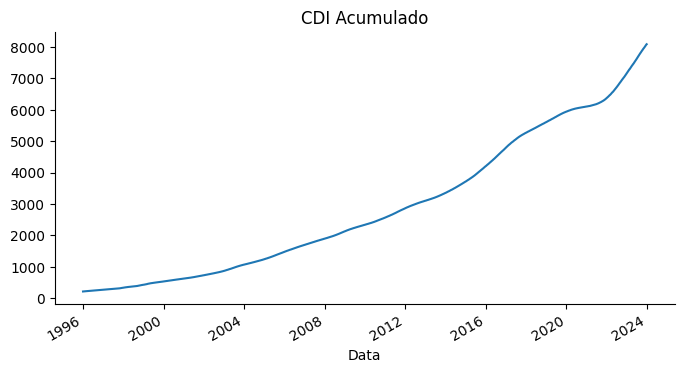

In [16]:
# @title CDI Acumulado

from matplotlib import pyplot as plt
CDI_interpolate['CDI Acumulado'].plot(kind='line', figsize=(8, 4), title='CDI Acumulado')
plt.gca().spines[['top', 'right']].set_visible(False)

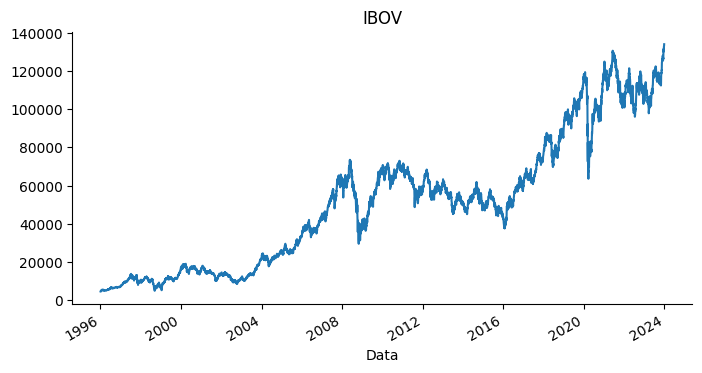

In [17]:
# @title IBOV

from matplotlib import pyplot as plt
CDI_interpolate['IBOV'].plot(kind='line', figsize=(8, 4), title='IBOV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
CDI_norm = pd.DataFrame()

In [19]:
CDI_norm['CDI Acumulado'] = CDI_interpolate['CDI Acumulado']/CDI_interpolate['CDI Acumulado'].iloc[0]
CDI_norm['IBOV'] = CDI_interpolate['IBOV']/CDI_interpolate['IBOV'].iloc[0]

In [20]:
CDI_norm

,CDI Acumulado,IBOV
Data,,
1996-01-02,1.000000,1.000000
1996-01-03,1.001173,1.066378
1996-01-04,1.002297,1.066970
1996-01-05,1.003423,1.069317
1996-01-08,1.004550,1.079954
...,...,...
2023-12-20,39.043263,29.795938
2023-12-21,39.060341,30.109797
2023-12-22,39.077425,30.239847


In [21]:
CDI_interpolate.isna().sum().sum()

0

In [22]:
CDI_interpolate.to_csv(pasta + 'CDI.csv')

In [23]:
# Calculate the returns
CDI_ret = CDI_norm.pct_change(1)
CDI_ret*100

,CDI Acumulado,IBOV
Data,,
1996-01-02,NaN,NaN
1996-01-03,0.117299,6.637813
1996-01-04,0.112295,0.055539
1996-01-05,0.112303,0.219898
1996-01-08,0.112302,0.994824
...,...,...
2023-12-20,0.043739,-0.793874
2023-12-21,0.043739,1.053361
2023-12-22,0.043739,0.431920


In [24]:
CDI_ret.to_csv(pasta + 'CDI_ret.csv')